In [1]:

import vmapper
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

from catppuccin_palette import catppuccin as cpc
import mplcatppuccin
from mplcatppuccin.palette import load_color
from mplcatppuccin.colormaps import get_colormap_from_list
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
#from jinja2 import Environment, PackageLoader, select_autoescape
import jinja2

In [2]:

import importlib
importlib.reload(vmapper)

<module 'vmapper' from '/home/benny/Workspaces/github/vmapper/vmapper/__init__.py'>

In [3]:
fs = sorted(os.listdir('../data/natural_earth'))
fs = [f for f in fs if '.shp' in f]
fs

['ne_110m_admin_0_boundary_lines_land.shp',
 'ne_110m_admin_0_countries.shp',
 'ne_110m_graticules_1.shp',
 'ne_110m_graticules_10.shp',
 'ne_110m_graticules_15.shp',
 'ne_110m_graticules_20.shp',
 'ne_110m_graticules_30.shp',
 'ne_110m_graticules_5.shp',
 'ne_110m_land.shp',
 'ne_110m_wgs84_bounding_box.shp']

<Axes: >

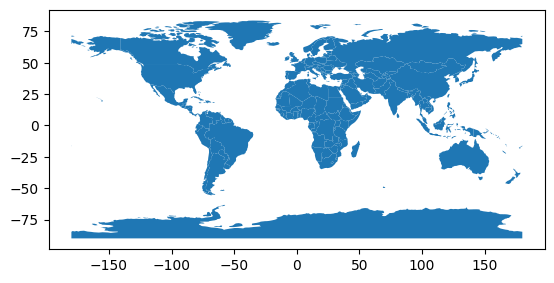

In [4]:
fp = '../data/natural_earth/ne_110m_admin_0_countries.shp'
#fp = 'data/natural_earth/ne_110m_land.shp'
gdf = gpd.read_file(fp)
gdf.plot()

<Axes: >

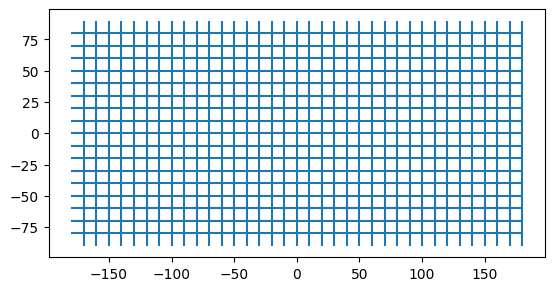

In [5]:
fp = '../data/natural_earth/ne_110m_graticules_10.shp'
grid = gpd.read_file(fp)
grid.plot()

In [6]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
gdf.head()
#gdf2 = gdf.reset_index()
#gdf2.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

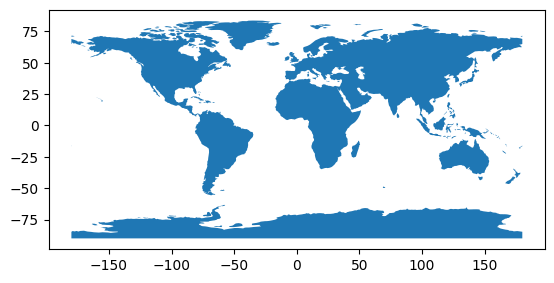

In [8]:
gdf2 = gdf#[gdf['SOV_A3']!='ATA']
gdf2 = gdf2.dissolve()
#gdf2 = gdf.reset_index()
#gdf2 = gdf2[gdf2['index']!=4]
gdf2.plot()

In [9]:
gdf3 = gdf2.explode()
gdf3 = gdf3[['featurecla', 'geometry']]
gdf3['area'] = gdf3.area
gdf3

/tmp/ipykernel_239810/524009270.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf3 = gdf2.explode()
/home/benny/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/geopandas/geodataframe.py:1805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[exploded_geom.name] = exploded_geom.values
/tmp/ipykernel_239810/524009270.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf3['area'] = gdf3.area


featurecla                                           geometry   
0 0    Admin-0 country  POLYGON ((-162.43985 -79.28147, -163.02741 -78...  \
  1    Admin-0 country  POLYGON ((-121.62283 -74.01047, -122.62173 -73...   
  2    Admin-0 country  POLYGON ((-127.28313 -73.46177, -126.55847 -73...   
  3    Admin-0 country  POLYGON ((-96.98376 -72.44286, -98.19808 -72.4...   
  4    Admin-0 country  POLYGON ((-179.79332 -16.02088, -179.91737 -16...   
...                ...                                                ...   
  122  Admin-0 country  POLYGON ((143.50528 46.13791, 142.74770 46.740...   
  123  Admin-0 country  POLYGON ((178.72530 71.09880, 180.00000 71.515...   
  124  Admin-0 country  POLYGON ((140.81171 73.76506, 142.06207 73.857...   
  125  Admin-0 country  POLYGON ((147.97746 74.77836, 146.11919 75.172...   
  126  Admin-0 country  POLYGON ((141.47161 76.09289, 145.08629 75.562...   

            area  
0 0     3.716703  
  1     1.541898  
  2     0.683017  
  3     3.004556  
  4     0.066993  
...          ...  
  122  10.600657  
  123   0.614355  
  124   1.628959  
  125   2.006982  
  126   8.673320  

[127 rows x 3 columns]

<Axes: >

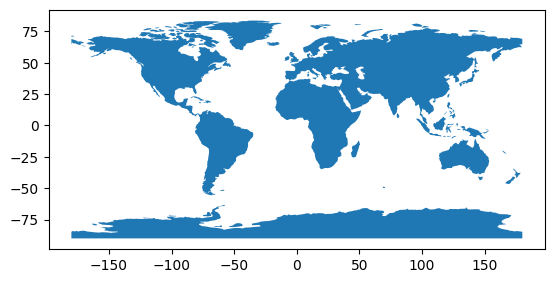

In [10]:
gdf4 = gdf3[gdf3['area']>1]
gdf4 = gdf4.reset_index(drop=True).reset_index().rename(columns={'index': 'id'})
gdf4.plot()

In [11]:
gdf4

,id,featurecla,geometry,area
0,0,Admin-0 country,"POLYGON ((-162.43985 -79.28147, -163.02741 -78...",3.716703
1,1,Admin-0 country,"POLYGON ((-121.62283 -74.01047, -122.62173 -73...",1.541898
2,2,Admin-0 country,"POLYGON ((-96.98376 -72.44286, -98.19808 -72.4...",3.004556
3,3,Admin-0 country,"POLYGON ((-78.18210 8.31918, -78.43547 8.38771...",4158.334445
4,4,Admin-0 country,"POLYGON ((-128.35841 50.77065, -127.30858 50.5...",4.056773
...,...,...,...,...
87,87,Admin-0 country,"POLYGON ((139.81754 42.56376, 140.31209 43.333...",9.979769
88,88,Admin-0 country,"POLYGON ((143.50528 46.13791, 142.74770 46.740...",10.600657
89,89,Admin-0 country,"POLYGON ((140.81171 73.76506, 142.06207 73.857...",1.628959
90,90,Admin-0 country,"POLYGON ((147.97746 74.77836, 146.11919 75.172...",2.006982


In [12]:
grid['display0'] = [d.replace(' ', '') for d in grid['display']]
grid

,degrees,direction,display,scalerank,dd,geometry,display0
0,80,N,80 N,4,80,"LINESTRING (180.00000 79.99848, 179.99664 79.9...",80N
1,70,N,70 N,4,70,"LINESTRING (180.00000 69.99847, 179.99664 69.9...",70N
2,60,N,60 N,4,60,"LINESTRING (180.00000 59.99866, 179.99664 59.9...",60N
3,50,N,50 N,4,50,"LINESTRING (179.99990 49.99876, 179.99664 49.9...",50N
4,40,N,40 N,4,40,"LINESTRING (179.99990 39.99875, 179.99664 39.9...",40N
5,30,N,30 N,4,30,"LINESTRING (179.99990 29.99889, 179.99664 29.9...",30N
6,20,N,20 N,4,20,"LINESTRING (180.00000 19.99909, 179.99664 19.9...",20N
7,10,N,10 N,4,10,"LINESTRING (179.99990 9.99918, 179.99664 9.999...",10N
8,0,N,0 NS,4,0,"LINESTRING (179.99990 -0.00083, 179.99664 -0.0...",0NS
9,10,S,10 S,4,-10,"LINESTRING (179.99990 -10.00068, 179.99664 -10...",10S


<Axes: >

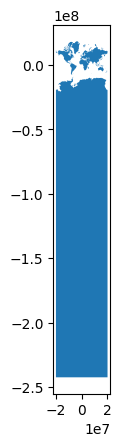

In [13]:
gdf4.to_crs('epsg:3857').plot()

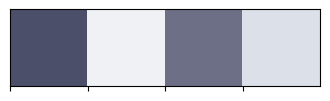

In [14]:
DARK = load_color('latte', 'text')
WHITE = load_color('latte', 'base')
LIGHTGRAY = load_color('latte', 'crust')
GRAY = load_color('latte', 'subtext0')
sns.palplot([DARK, WHITE, GRAY, LIGHTGRAY])

In [15]:
cpc.color_palette

<function catppuccin_palette.catppuccin.color_palette(cat='mocha', n=None)>

In [16]:
projections = {
    #'Pseudo-Mercator': 'epsg:3857',
    #'Mercator': '+proj=merc', 
    'Natural Earth': '+proj=natearth',
    'Gall': '+proj=gall', 
    'Miller Cylindrical': '+proj=mill',
    'Goode': '+proj=igh +towgs84=0,0,0',
    'Mollweide': '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs',
    'Aitoff': '+proj=aitoff', 
    'Lagrange': '+proj=lagrng', 
    'Robinson': '+proj=robin +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs', 
    'Winkel Tripel': '+proj=wintri +lon_0=0 +lat_1=50.467 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs',
    'Eckert III': '+proj=eck3',
    'Hammer-Eckert-Greifendorff': '+proj=hammer', 
    'Nell-Hammer': '+proj=nell_h',
    'Collignon': '+proj=collg',
    'Lambert Azimuthal Equal Area': '+proj=laea',
    #'Lambert Equal Area Conic': '+proj=leac',
    #'Stereographic': '+proj=stere +lat_0=90 +lat_ts=75', 
    #'Tissot': '+proj=tissot +lat_1=60 +lat_2=65',
    'Sinusoidal': '+proj=sinu', 
    'Polyconic': '+proj=poly', 
    'Foucaut': '+proj=fouc', 
    'Bonne': '+proj=bonne +lat_1=10', 
    'Boggs Eumorphic': '+proj=boggs', 
    #'Murdoch I': '+proj=murd1 +lat_1=30 +lat_2=50',
    'General Oblique Transformation': '+proj=ob_tran +o_proj=mill +o_lon_p=40 +o_lat_p=50 +lon_0=60',
    'Roussilhe Stereographic': '+proj=rouss',
    'Urmaev Flat-Polar Sinusoidal': '+proj=urmfps +n=0.5'
}

/tmp/ipykernel_239810/1005460602.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 6), facecolor=WHITE)


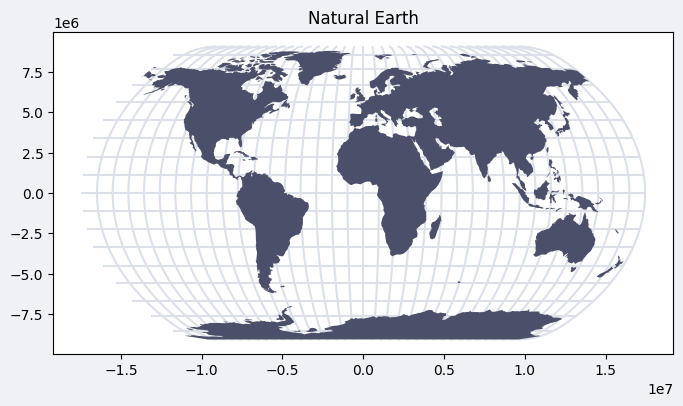

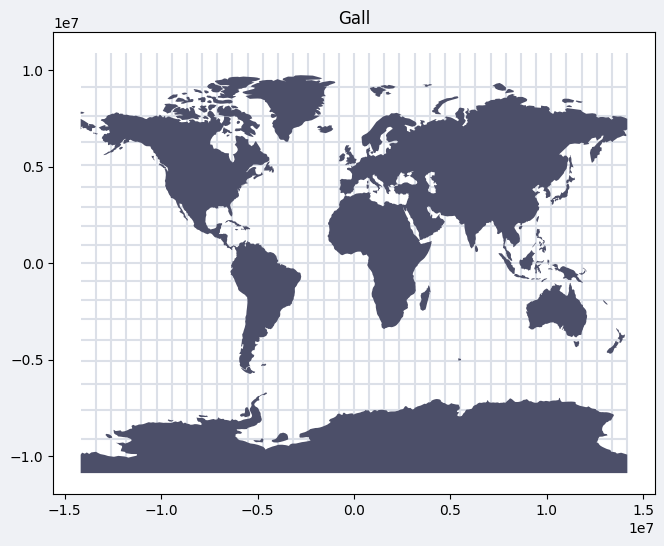

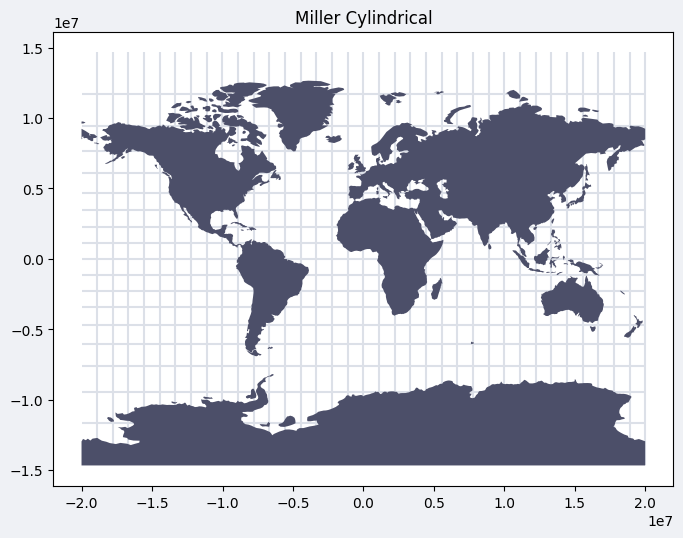

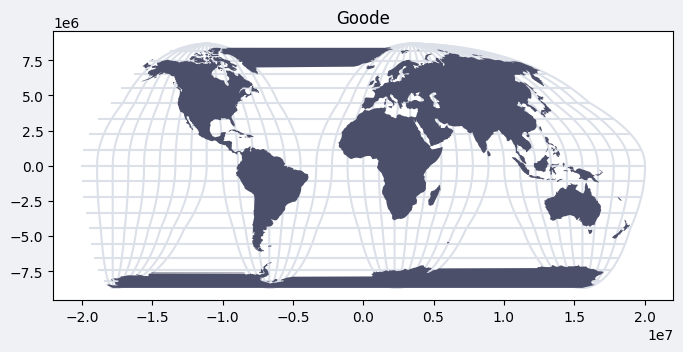

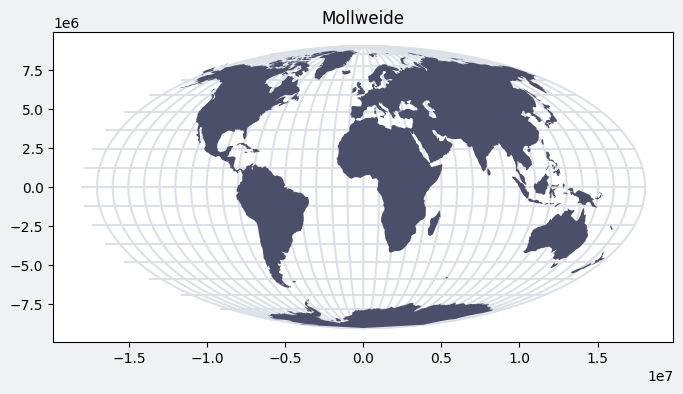

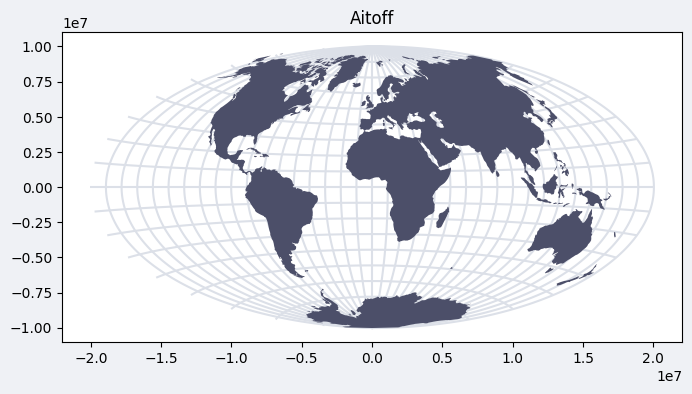

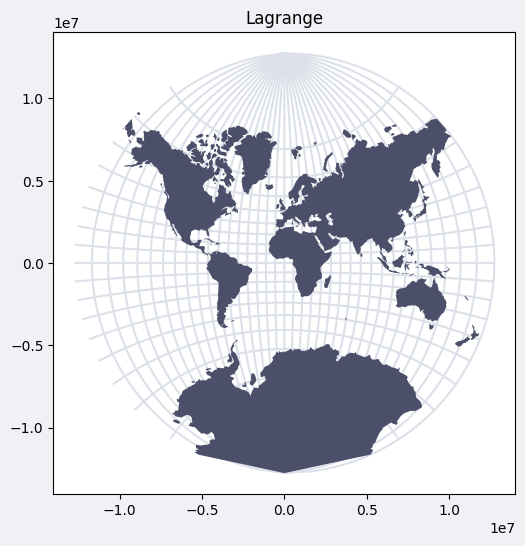

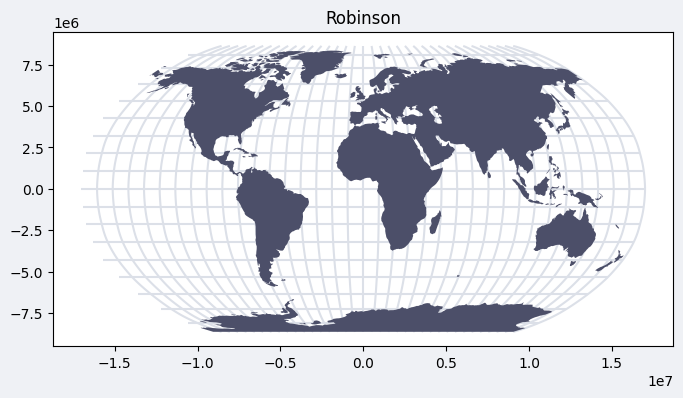

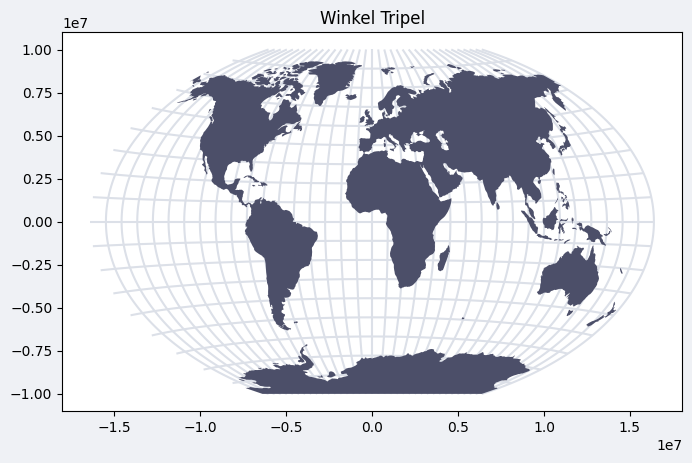

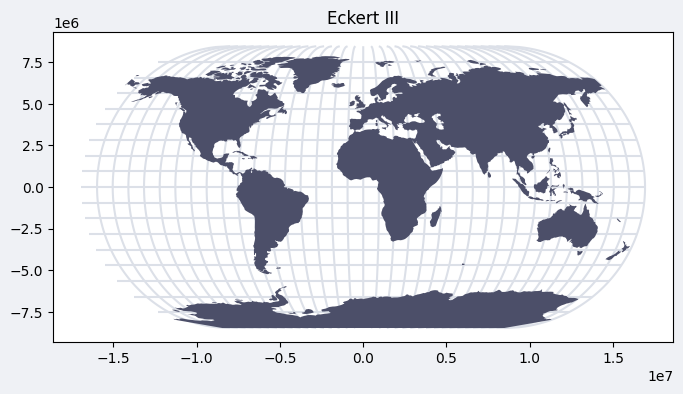

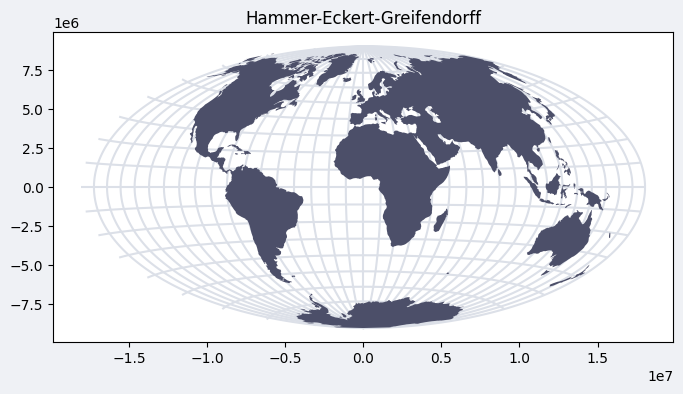

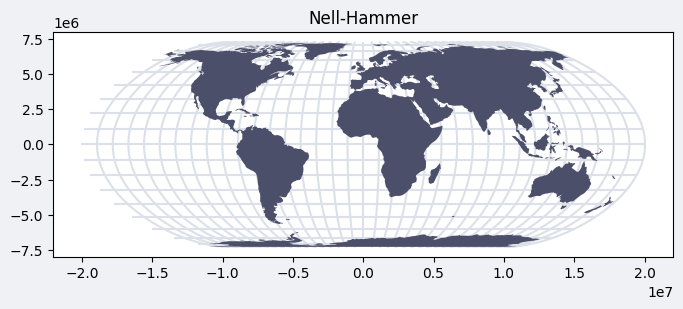

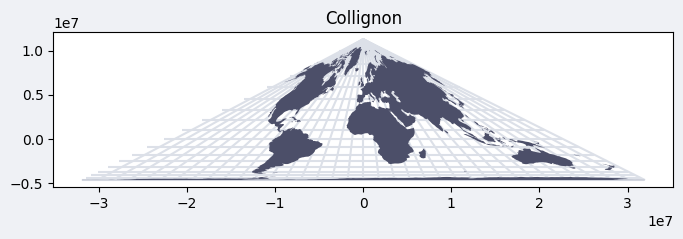

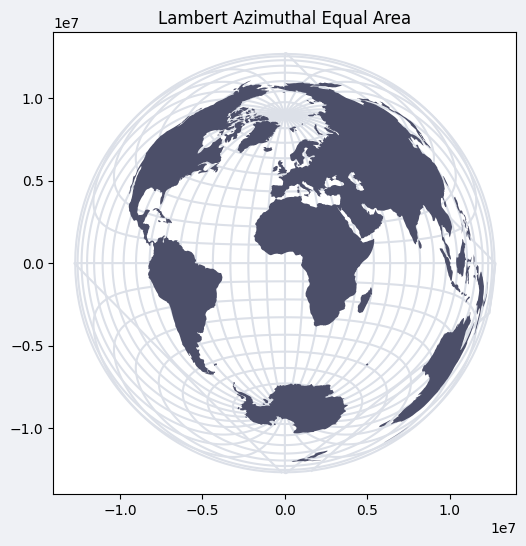

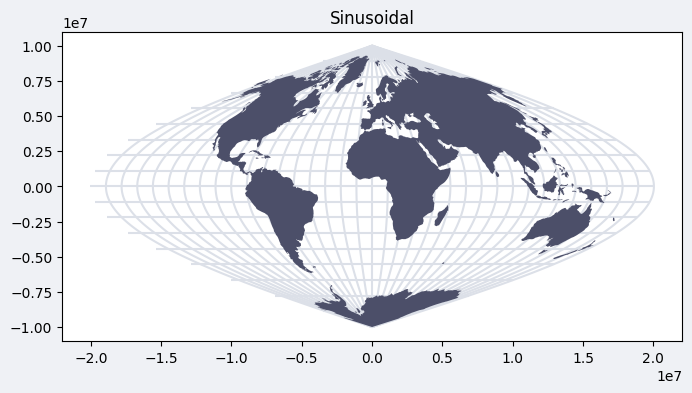

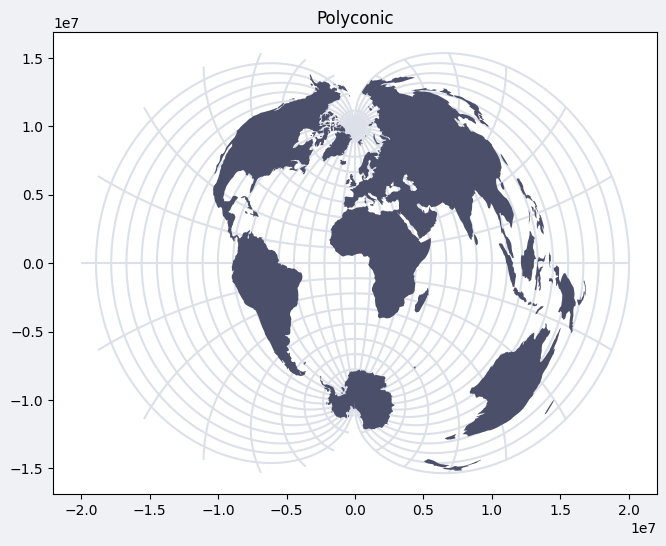

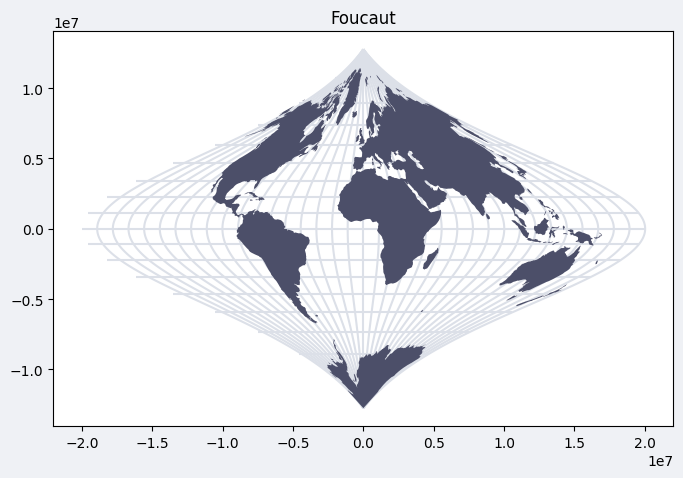

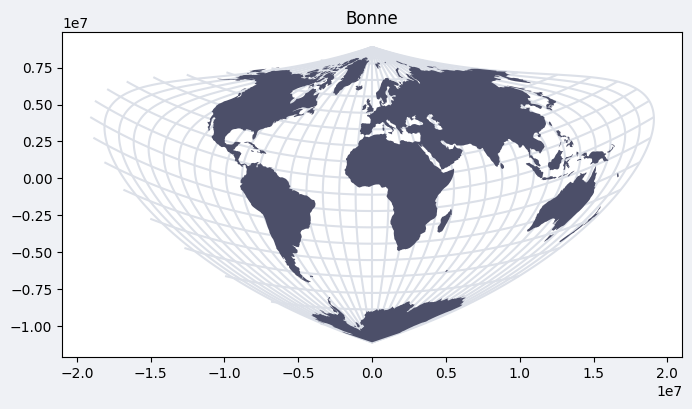

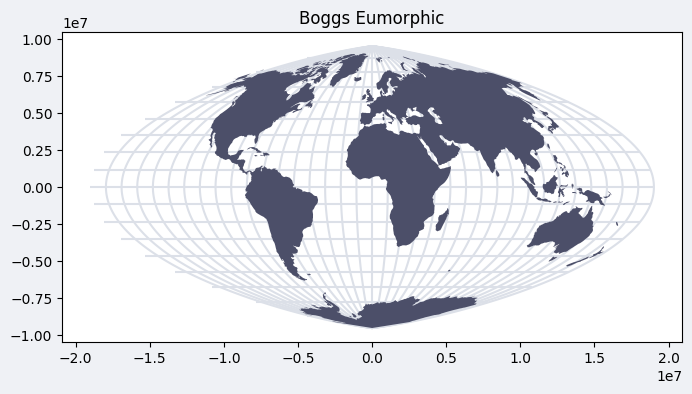

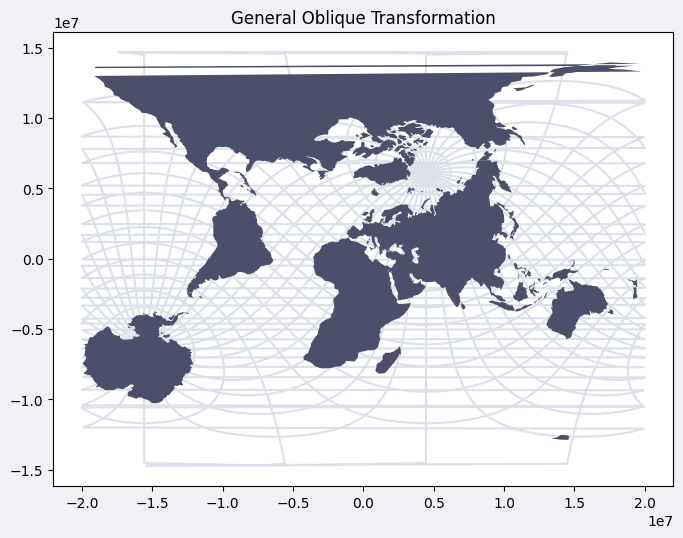

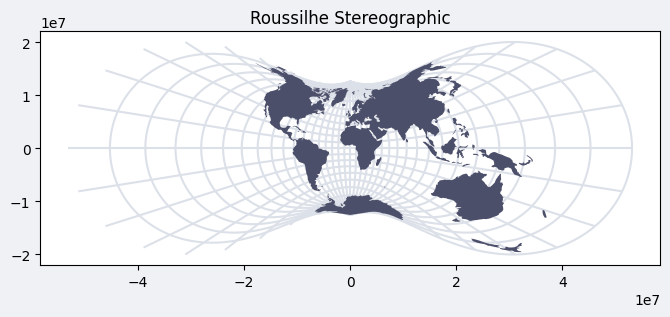

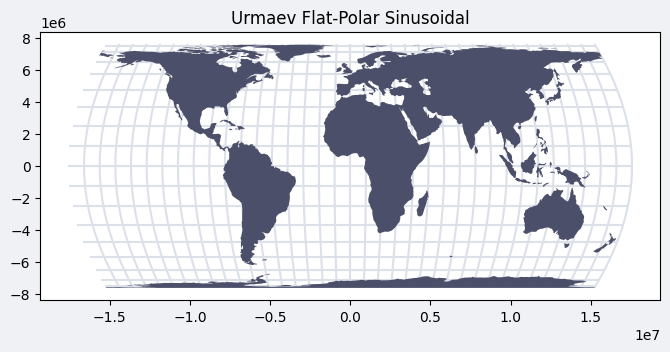

In [17]:
for k, crs in projections.items():
    fig, ax = plt.subplots(figsize=(8, 6), facecolor=WHITE)
    grid.to_crs(crs).plot(ec=LIGHTGRAY, ax=ax, zorder=2)
    gdf4.to_crs(crs).plot(fc=DARK, ec=WHITE, lw=0, ax=ax, zorder=3)
    ax.set_title(k)
    #ax.axis('off')
    #image_name = 'exports/worldmap_{}.svg'.format(k.replace(' ', '_'))
    #image_format = 'svg'
    #fig.savefig(image_name, format=image_format, dpi=1200)
    #break

<Axes: >

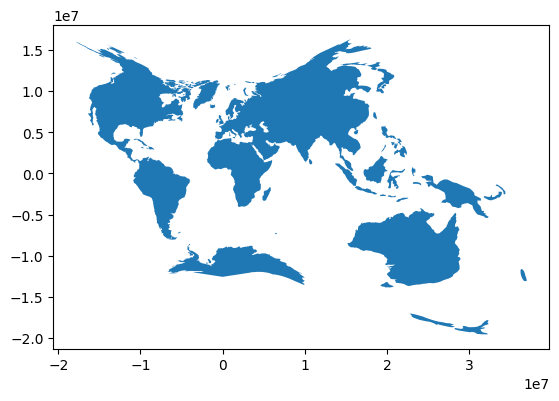

In [18]:
gdf4.to_crs('+proj=rouss').plot()


<Axes: >

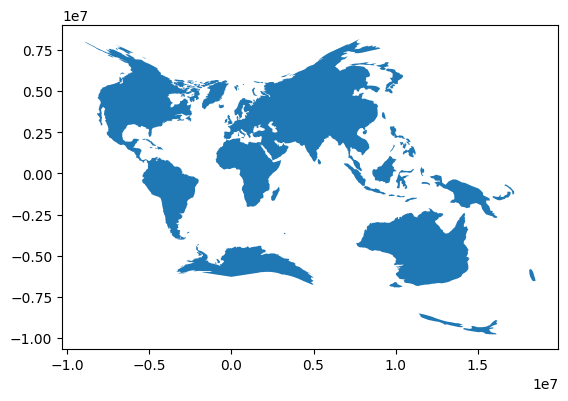

In [19]:
gdf5 = gdf4.to_crs('+proj=rouss').copy()
gdf5.scale(0.5, 0.5, origin=(0., 0.)).plot()

In [20]:
gdf5.scale(0.5, 0.5, origin=(0., 0.))

0     POLYGON ((-2833636.151 -6061745.071, -2929775....
1     POLYGON ((-2970321.621 -5647308.294, -3052956....
2     POLYGON ((-2526772.410 -5273957.553, -2555416....
3     POLYGON ((-5115191.063 740110.068, -5136958.57...
4     POLYGON ((-6750680.336 5852705.025, -6704637.4...
                            ...                        
87    POLYGON ((9101031.312 6319622.536, 9016829.446...
88    POLYGON ((8825410.039 6680108.830, 8636916.744...
89    POLYGON ((3526643.019 5960389.734, 3543120.622...
90    POLYGON ((3517254.719 6049904.468, 3389092.869...
91    POLYGON ((3092267.266 5910239.172, 3284547.451...
Length: 92, dtype: geometry

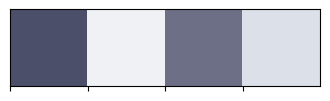

In [21]:
DARK = load_color('latte', 'text')
WHITE = load_color('latte', 'base')
LIGHTGRAY = load_color('latte', 'crust')
GRAY = load_color('latte', 'subtext0')
sns.palplot([DARK, WHITE, GRAY, LIGHTGRAY])

In [22]:
def generate_svg(the_gdf, the_grid, title, vis):
    k2 = title.replace(' ', '_')
    m = vmapper.Map(interactive=False, params={'bgcolor': WHITE})
    m.add_geodataframe(the_grid, layername='{}-grid'.format(k2), 
        draw_setting=dict(labelby='display0', idby='display2'),
        strokecolor=DARK, 
        strokewidth=30000, showlabel=False, 
        visibility=vis)
    m.add_geodataframe(the_gdf, layername='{}-land'.format(k2), 
        draw_setting=dict(labelby='id', idby='id2'), 
        color=DARK, opacity=1.0, strokecolor=DARK, strokewidth=30, showlabel=False, 
        visibility=vis)
    m.add_title(title+' Projection')
    output_path = '../exports/worldmap_{}.svg'.format(k2)
    m.export_to_file(output_path)

In [79]:
check = 0
for k, crs in projections.items():
    the_grid = grid.to_crs(crs)  #.plot(ec=GRAY, ax=ax, zorder=2)
    the_gdf = gdf4.to_crs(crs)  #.plot(fc=DARK, ec=WHITE, lw=0, ax=ax, zorder=3)
    k2 = k.replace(' ', '_')
    the_gdf['id2'] = ['{}-{}'.format(k2, i) for i in the_gdf['id']]
    the_grid['display2'] = ['{}-{}'.format(k2, i) for i in the_grid['display0']]
    vis = 'hidden' if check>0 else 'visible'
    #print(the_gdf)
    generate_svg(the_gdf, the_grid, k, vis)
    #check+=1
    #break

exported to : exports/worldmap_Gall.svg
exported to : exports/worldmap_Miller_Cylindrical.svg
exported to : exports/worldmap_Goode.svg
exported to : exports/worldmap_Mollweide.svg
exported to : exports/worldmap_Aitoff.svg
exported to : exports/worldmap_Lagrange.svg
exported to : exports/worldmap_Natural_Earth.svg
exported to : exports/worldmap_Robinson.svg
exported to : exports/worldmap_Winkel_Tripel.svg
exported to : exports/worldmap_Eckert_III.svg
exported to : exports/worldmap_Hammer-Eckert-Greifendorff.svg
exported to : exports/worldmap_Nell-Hammer.svg
exported to : exports/worldmap_Collignon.svg
exported to : exports/worldmap_Lambert_Azimuthal_Equal_Area.svg
exported to : exports/worldmap_Lambert_Equal_Area_Conic.svg
exported to : exports/worldmap_Sinusoidal.svg
exported to : exports/worldmap_Polyconic.svg
exported to : exports/worldmap_Foucaut.svg
exported to : exports/worldmap_Bonne.svg
exported to : exports/worldmap_Boggs_Eumorphic.svg
exported to : exports/worldmap_General_Obl

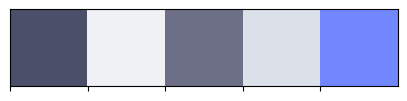

In [23]:
DARK = load_color('latte', 'text')
WHITE = load_color('latte', 'base')
LIGHTGRAY = load_color('latte', 'crust')
GRAY = load_color('latte', 'subtext0')
LINE = load_color('latte', 'lavender')
sns.palplot([DARK, WHITE, GRAY, LIGHTGRAY, LINE])

In [24]:
def generate_svg2(m, the_gdf, the_grid, title, vis):
    #m = vmapper.Map(interactive=False, params={'bgcolor': WHITE})
    m.add_geodataframe(the_grid, layername='{}-grid'.format(title.replace(' ', '_')), 
        draw_setting=dict(labelby='display0', idby='display2'),
        strokecolor=LINE, opacity=0.7,
        strokewidth=30000, showlabel=False, visibility=vis)
    m.add_geodataframe(the_gdf, layername='{}-land'.format(title.replace(' ', '_')), 
        draw_setting=dict(labelby='id', idby='id2'), 
        color=DARK, opacity=1.0, strokecolor=DARK, strokewidth=30, showlabel=False, 
        visibility=vis)
    #m.add_title(title+' Projection')

In [25]:
m = vmapper.Map(interactive=False, params={'bgcolor': WHITE})

scaledown_list = ['Roussilhe Stereographic']
check = 0
proj_list = []
for k, crs in projections.items():
    vis = 'hidden' if check>0 else 'visible'
    the_grid = grid.to_crs(crs).copy()  #.plot(ec=GRAY, ax=ax, zorder=2)
    the_gdf = gdf4.to_crs(crs).copy()  #.plot(fc=DARK, ec=WHITE, lw=0, ax=ax, zorder=3)
    if k in scaledown_list:
        the_grid['geometry'] = the_grid.scale(0.5, 0.5, origin=(0., 0.))
        the_gdf['geometry'] = the_gdf.scale(0.5, 0.5, origin=(0., 0.))
    k2 = k.replace(' ', '_')
    the_gdf['id2'] = ['{}-{}'.format(k2, i) for i in the_gdf['id']]
    the_grid['display2'] = ['{}-{}'.format(k2, i) for i in the_grid['display0']]
    #print(the_gdf)
    generate_svg2(m, the_gdf, the_grid, k, vis)
    proj_list.append(k)
    print(k)
    check+=1
    #if check==4:
    #    break

#output_path = 'exports/worldmap_all.svg'
#m.export_to_file(output_path)

Natural Earth
Gall
Miller Cylindrical
Goode
Mollweide
Aitoff
Lagrange
Robinson
Winkel Tripel
Eckert III
Hammer-Eckert-Greifendorff
Nell-Hammer
Collignon
Lambert Azimuthal Equal Area
Sinusoidal
Polyconic
Foucaut
Bonne
Boggs Eumorphic
General Oblique Transformation
Roussilhe Stereographic
Urmaev Flat-Polar Sinusoidal


In [26]:
svgText = m.make_scene()
#print(outputText)

In [28]:
temp_vars = {'first_title': proj_list[0], 
             'first_proj4': projections[proj_list[0]],
             'content': svgText,
             'projections_collection': proj_list[1:],
             'projs': projections,
}
temp_vars['first_title']

'Natural Earth'

In [29]:
templateLoader = jinja2.FileSystemLoader( searchpath="." )
templateEnv = jinja2.Environment( loader=templateLoader )
TEMPLATE_FILE = "map_template.html"

template = templateEnv.get_template( TEMPLATE_FILE )
outputText = template.render( temp_vars )

outputfn = 'test2.html'

with open(outputfn, 'wb') as f:
    f.write(outputText.encode("utf-8"))